## Working with USGS data

*Olm* contains a variety of functions for retrieving discharge and water quality data from NWIS, the USGS water database. These functions are contained within the [`olm.USGS`](https://olm.readthedocs.io/en/master/olm.USGS.html) package.

In [15]:
#Check whether we are running on Colab or locally.
try:
    import google.colab
    IN_COLAB = True
    base_path = 'https://raw.githubusercontent.com/CovingtonResearchGroup/olm-examples/USGS/'
except:
    IN_COLAB = False
    base_path = './'
print('Base working path for data files is',base_path)


Base working path for data files is ./


In [ ]:
#If olm isn't already installed (or if you're running in Colab), then run this cell of code.
!pip install olm-karst

In [8]:
#We will run in pylab mode, to import plotting functions.
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Obtaining metadata about a USGS site

In [2]:
from olm.USGS.DataRetrieval import GetSiteData
#Use a USGS site number to retrieve the data
site_no = 'USGS-07056000' #Buffalo River near St Joe, AR

StJoe_meta = GetSiteData(site_no)
StJoe_meta

OrganizationIdentifier                                                                       USGS-AR
OrganizationFormalName                                            USGS Arkansas Water Science Center
MonitoringLocationIdentifier                                                           USGS-07056000
MonitoringLocationName                                                Buffalo River near St. Joe, AR
MonitoringLocationTypeName                                                                    Stream
MonitoringLocationDescriptionText                                                                NaN
HUCEightDigitCode                                                                           11010005
DrainageAreaMeasure/MeasureValue                                                                 829
DrainageAreaMeasure/MeasureUnitCode                                                            sq mi
ContributingDrainageAreaMeasure/MeasureValue                                               

#### Obtaining daily discharge values

You can obtain a daily average discharge value for a given date using [`olm.USGS.DataRetrieval.GetDailyDischarge()`](https://olm.readthedocs.io/en/master/olm.USGS.DataRetrieval.GetDailyDischarge.html#olm.USGS.DataRetrieval.GetDailyDischarge)

In [4]:
from olm.USGS.DataRetrieval import GetDailyDischarge
Q = GetDailyDischarge(site_no, '2021-01-01')
#Discharge and some additional metadata are returned in a dictionary
print(Q)

Discharge query html:  https://waterservices.usgs.gov/nwis/dv?format=waterml,1.1&sites=07056000&startDT=2021-01-01&endDT=2021-01-01
{'discharge': '6830', 'quality': 'P', 'name': 'Buffalo River near St. Joe, AR'}


In [5]:
print('Mean discharge on January 1, 2021 was',Q['discharge'], 'cfs')

Mean discharge on January 1, 2021 was 6830 cfs


You can obtain a mean daily discharge record for a longer period using  [`olm.USGS.DataRetrieval.GetDailyDischargeRecord()`](https://olm.readthedocs.io/en/master/olm.USGS.DataRetrieval.GetDailyDischargeRecord.html#olm.USGS.DataRetrieval.GetDailyDischargeRecord).

Text(0, 0.5, 'Stream flow (cfs)')

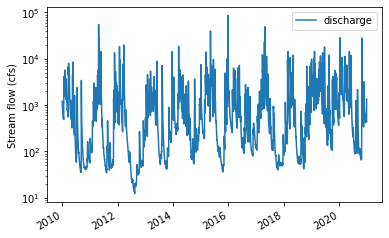

In [12]:
from olm.USGS.DataRetrieval import GetDailyDischargeRecord
StJoe_Q = GetDailyDischargeRecord(site_no, '2010-01-01', '2020-12-31')
#Discharge and some additional metadata are returned in a dictionary
StJoe_Q.plot(logy=True)
ylabel('Stream flow (cfs)')

### Automatic queries of water quality data

The most powerful functionality of the `olm.USGS` package lies in its ability to query, download, and process large sets of water quality data from a list of USGS sites. To set up one of these queries, you need to create or modify two files.
1. Create a text file that contains a list of the site numbers of interest, each on its own line.
2. Modify the runWQXtoPandas Excel file (called a start file) to provide the desired chemical parameters to query and a variety of other settings that control the query and how the data are stored (open the [provided Excel file](https://raw.githubusercontent.com/CovingtonResearchGroup/olm-examples/USGS/USGS/runWQXtoPandas-Buffalo-Start-File.xls) to see an example).

In [19]:
#If we are running in Colab, we need to create local files that contain 
#the site number list and start file.
#We will download these from Github.
if IN_COLAB:
    import requests
    %mkdir USGS
    res = requests.get(base_path + 'USGS/Buffalo.txt')
    with open('USGS/Buffalo.txt', 'w') as f:
        f.write(res.text)
    res = requests.get(base_path + 'USGS/runWQXtoPandas-Buffalo-Start-File.xls')
    with open('USGS/runWQXtoPandas-Buffalo-Start-File.xls', 'wb') as f:
      f.write(res.content)

mkdir: cannot create directory ‘USGS’: File exists


In [21]:
from olm.USGS.WQXtoPandas import runWQXtoPandas

print('*********************************')
print('**This will take a while to run**')
print('*********************************')

#This function is run on the start file
runWQXtoPandas(base_path+'/USGS/runWQXtoPandas-Buffalo-Start-File.xls')


*********************************
**This will take a while to run**
*********************************
Processing: .//USGS/runWQXtoPandas-Buffalo-Start-File.xls
sitesdir /home/mcoving/github/olm-examples/Buffalo


An xml file (./Buffalo/buffalo.log.xml) already exists.  
 Use this instead of html query (y or n)? y


Processing sample from USGS-07055646 on 1993-04-28
Discharge query html:  https://waterservices.usgs.gov/nwis/dv?format=waterml,1.1&sites=07055646&startDT=1993-04-28&endDT=1993-04-28
Processing sample from USGS-07055646 on 1993-05-24
Discharge query html:  https://waterservices.usgs.gov/nwis/dv?format=waterml,1.1&sites=07055646&startDT=1993-05-24&endDT=1993-05-24
Processing sample from USGS-07055646 on 1993-06-21
Discharge query html:  https://waterservices.usgs.gov/nwis/dv?format=waterml,1.1&sites=07055646&startDT=1993-06-21&endDT=1993-06-21
Processing sample from USGS-07055646 on 1993-07-19
Discharge query html:  https://waterservices.usgs.gov/nwis/dv?format=waterml,1.1&sites=07055646&startDT=1993-07-19&endDT=1993-07-19
Processing sample from USGS-07055646 on 1993-08-30
Discharge query html:  https://waterservices.usgs.gov/nwis/dv?format=waterml,1.1&sites=07055646&startDT=1993-08-30&endDT=1993-08-30
Processing sample from USGS-07055646 on 1993-09-20
Discharge query html:  https://wat

### Analyzing USGS data retrieved via *Olm*

To load the data from all sites in a query, you provide the site data directory to [`olm.USGS.loadWaterQualityData.loadSiteListData()`](https://olm.readthedocs.io/en/master/olm.USGS.loadWaterQualityData.loadSiteListData.html#olm.USGS.loadWaterQualityData.loadSiteListData)

In [24]:
from olm.USGS.loadWaterQualityData import loadSiteListData

sitesDict = loadSiteListData(processedSitesDir='Buffalo/')

In [26]:
#Data are accessed for each site using a dictionary key that is the site name
sitesDict.keys()

dict_keys(['USGS-07056000', 'USGS-07055646'])

In [59]:
#For each site, the site number will retrieve a DataFrame from sitesDict with  multiindexed columns 
mi = sitesDict['USGS-07056000'].columns

print('Chemical parameters are = ',mi.levels[1])

print('For each chemical parameter the following are stored = ',mi.levels[0])


Chemical parameters are =  Index(['Alkalinity', 'Calcium', 'Carbon dioxide', 'Chloride', 'Magnesium',
       'Nitrate', 'Organic carbon', 'Oxygen', 'Potassium', 'Sodium',
       'Specific conductance', 'Stream flow, instantaneous',
       'Stream flow, mean. daily', 'Sulfate', 'Temperature, water', 'pH'],
      dtype='object')
For each chemical parameter the following are stored =  Index(['count', 'data', 'fraction', 'nondetect', 'pcode', 'quality', 'time',
       'timezone', 'units'],
      dtype='object')


In [60]:
#Normally, we will just want the data (get it, as below). 
#The other quality and metadata may also be useful and can 
#be obtained with the corresponding column name.
StJoe = sitesDict['USGS-07056000']['data']
Boxley = sitesDict['USGS-07055646']['data']

In [61]:
#Each site has a DataFrame containing chemical parameters
Boxley.head()

,Alkalinity,Calcium,Carbon dioxide,Chloride,Magnesium,Nitrate,Organic carbon,Oxygen,Potassium,Sodium,Specific conductance,"Stream flow, instantaneous","Stream flow, mean. daily",Sulfate,"Temperature, water",pH
1993-04-28 16:30:00,24.0,8.5,0.8,1.1,0.97,0.1355,0.6,52.55,0.6,1.0,58.5,37.00,75.00,3.0,16.0,7.8
1993-05-24 16:30:00,23.0,7.5,0.6,1.9,0.96,0.1355,0.8,55.90,0.6,1.0,58.0,65.80,101.00,2.7,21.0,7.9
1993-06-21 14:00:00,52.0,18.0,2.2,0.8,1.70,0.1355,0.5,63.40,0.9,1.3,109.0,3.60,7.00,2.9,28.5,7.7
1993-07-19 15:30:00,71.0,25.0,1.7,0.9,2.10,0.1355,0.7,60.75,0.9,1.5,155.0,0.72,1.40,3.4,28.5,7.9
1993-08-30 12:30:00,88.0,33.0,6.1,1.5,2.60,0.1355,0.9,48.00,1.2,1.7,175.0,0.06,0.13,4.2,25.5,7.5


#### Making a basic plot using the data retrieved

We will examine the relationship between Ca and discharge at the two sites.

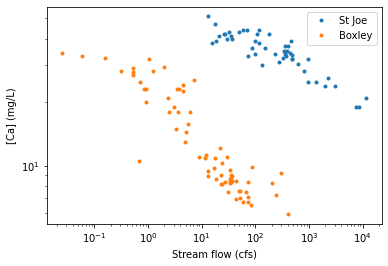

In [65]:
loglog(StJoe['Stream flow, instantaneous'], StJoe['Calcium'], '.')
loglog(Boxley['Stream flow, instantaneous'], Boxley['Calcium'], '.')
ylabel('[Ca] (mg/L)')
xlabel('Stream flow (cfs)')
legend(['St Joe','Boxley'])

#### Basic carbonate calculations using the USGS data

In [73]:
from olm.calcite import solutionFrompHCaRelaxed, concCaEqFromSolution
from olm.general import molL_to_mgL

Boxley_sols = solutionFrompHCaRelaxed(Boxley['Calcium'], Boxley['pH'], T_C=Boxley['Temperature, water'])
#Calculate saturation concentration of Ca and convert to mg/L
Boxley_CaEq = molL_to_mgL(concCaEqFromSolution(Boxley_sols), 'Ca')
Boxley_sat = Boxley['Calcium']/Boxley_CaEq

StJoe_sols = solutionFrompHCaRelaxed(StJoe['Calcium'], StJoe['pH'], T_C=StJoe['Temperature, water'])
#Calculate saturation concentration of Ca and convert to mg/L
StJoe_CaEq = molL_to_mgL(concCaEqFromSolution(StJoe_sols), 'Ca')
StJoe_sat = StJoe['Calcium']/StJoe_CaEq

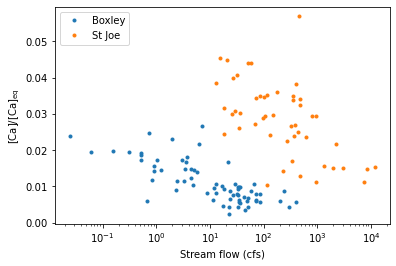

In [78]:
semilogx(Boxley['Stream flow, instantaneous'], Boxley_sat, '.')
semilogx(StJoe['Stream flow, instantaneous'], StJoe_sat, '.')
legend(['Boxley', 'St Joe'], loc='upper left')
xlabel('Stream flow (cfs)')
ylabel(r'$\rm{[Ca]/[Ca]_{eq}}$');